# Fitness Class




## Data Validation

The dataset contains **1500 rows and 8 columns** with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:
 - booking_id: Same as description without missing values.
 - months_as_member: Same as description without missing values.
 - weight: 20 missing values, replaced with overall average weight. 
 - days_before: Values were originally strings with some of the numbers having 'days' on the end. Stripped 'days' and white space off and then converted to type int. No missing values. 
 - day_of_week: Values were originally not all in 3 letter and no punctuation form. Replaced 'Fri.' to 'Fri', replaced 'Monday' to 'Mon', and replaced 'Wednesday' to ' Wed'. After converted from string to category so that it would be an ordinal data type. No missing values. 7 categories
 - time: Same as description without missing values. Converted to category so that it would be ordinal. No missing values. 2 categories.
 - category: 13 values labeled as '-', so presumed to be missing. Replaced with 'unknown'. 6 categories including 'unknown'.
 - attended: Same as description with no missing values. Converted to True and False for easier understandability on graphs. 
 
After the data validation, the dataset contains **1500 rows and 8 columns.**
 

### Original Dataset

In [2]:
# Data Validation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('fitness_class_2212 (1).csv')
df.info()
df.describe
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


### After replacing the missing values in weight to overall average weight

In [3]:
overall_average_weight = df.weight.mean().round(2)
df.weight.fillna(overall_average_weight, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


### After stripping and converting type of days_before

In [4]:
df['days_before'] = df.days_before.str.strip('days').str.strip()
df['days_before'] = df.days_before.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 93.9+ KB


### After replacing day_of_week to proper categorical form

In [5]:
df['day_of_week'] = df.day_of_week.str.replace('Fri.', 'Fri')
df['day_of_week'] = df.day_of_week.str.replace('Wednesday', 'Wed')
df['day_of_week'] = df.day_of_week.str.replace('Monday', 'Mon')
df['day_of_week'] = df.day_of_week.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   object  
 6   category          1500 non-null   object  
 7   attended          1500 non-null   int64   
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 84.0+ KB


### After re-assigning time to type 'category'

In [6]:
df['time'] = df.time.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   object  
 7   attended          1500 non-null   int64   
dtypes: category(2), float64(1), int64(4), object(1)
memory usage: 73.8+ KB


### After changing missing values in category to 'unknown' and reassigning variable to type 'category'

In [7]:
df['category'] = df.category.str.replace('-', 'unknown')
df['category'] = df.category.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   int64   
dtypes: category(3), float64(1), int64(4)
memory usage: 63.8 KB


### Changing Attended to Bool for graph readability 

In [8]:
df['attended'] = df.attended.replace({0:False, 1:True})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   bool    
dtypes: bool(1), category(3), float64(1), int64(3)
memory usage: 53.5 KB


## Exploratory Analysis 

**Graph 1** shows us how many bookings attended the class. The Attended variable is going to be our target variable. The **Not Attended** group has 1046 observations in the dataset, having twice as many observations compared to the **Attended** group which has 454. **Graph 2** displays the distribution of Attended and Not Attended grouped by the category of fitness class booked. We see that HIIT and cycling are the most popular classes. The observations are not balanced by Attended or not alone; however, when looking at the Attended variable split up by type of class, we see that about every class has half of the bookings actually attending leading to the conclusion that the observations are balanced across categories of the variable attended. 

From **Graph 3**, we see the distribution of months as a member as this fitness club. From the box plot we see that there are **103 outliers** for months as a member. We also see that the IQR for months as a member is between 8 and 19 months. We have 1500 observations in total, but because only 454 of those observations are bookings that actaully attended the class, the decision has been made not to exclude the 103 outliers. 

This is also backed up by **Graph 4 and 5** that show the relationship between months as a member and the outcome of attending booked classes or not. As we can see, the attended group has a higher mean, median, and IQR compared to the not attened group. Also because this is a gym dataset, these outliers represent natural variations in the months as member variable and are true outliers. 

There are a few extra plots showing different details about variables that were not used to answer the questions above but still relevant for validation and letting you know I did my proper dilligence with the dataset. 

Finally, to enable model fitting, I have made the following changes:
- Remove the booking_id column because ID variables should not be included as predictors, because we are trying to train a model to understand general patterns. Booking_id offers no insight into what drives a member to attend or not. 
- Converted attended from True and False back to 0 and 1 for classfication.
- Convert all the categorical variables into dummy variables. 


### Inspecting the attended variable 

The number of classes booked and attended is 454 and the number of classes booked and not attended is 1046 in the dataset.


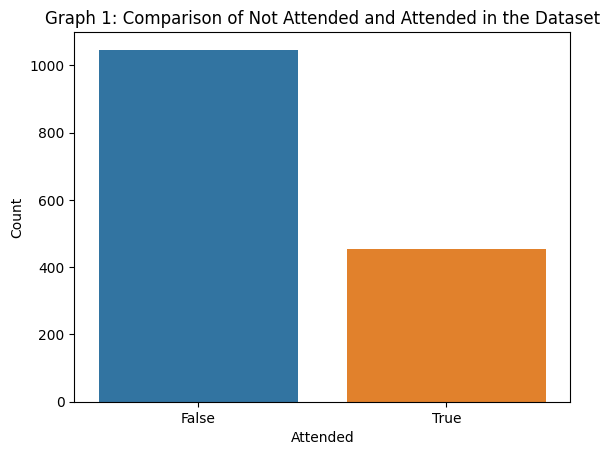

In [8]:
not_attended = df[df['attended'] == 0]
count_not_attended = len(not_attended)


attended = df[df['attended'] == 1]
count_attended = len(attended)

print(f'The number of classes booked and attended is {count_attended} and the number of classes booked and not attended is {count_not_attended} in the dataset.')

chart = sns.countplot(data = df, x = 'attended').set(title = 'Graph 1: Comparison of Not Attended and Attended in the Dataset', ylabel = 'Count', xlabel = 'Attended')


### Inspecting the relationship between fitness class category and attended variables

[Text(0.5, 1.0, 'Graph 2: Distribution of Attended and Not Attended by Category'),
 Text(0.5, 0, 'Fitness Class Category'),
 Text(0, 0.5, 'Count')]

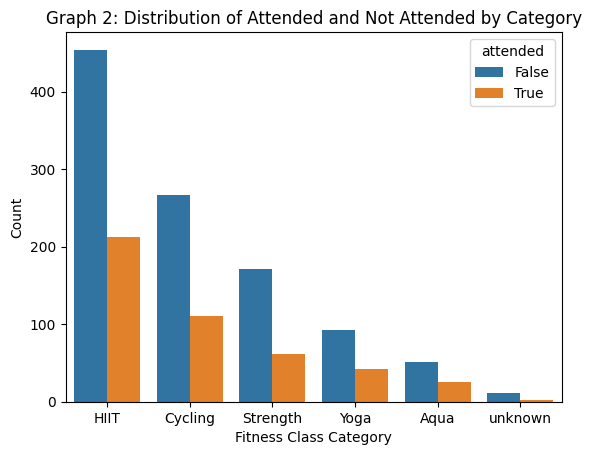

In [9]:
sns.countplot(data = df, x = 'category', hue = 'attended', order = ['HIIT', 'Cycling', 'Strength', 'Yoga', 'Aqua', 'unknown']).set(title = 'Graph 2: Distribution of Attended and Not Attended by Category', xlabel = 'Fitness Class Category', ylabel = 'Count')

### Calculating the number of outliers in the Months as Member variable

In [10]:
months_as_member = df['months_as_member']

q1 = np.quantile(months_as_member, .25)
q3 = np.quantile(months_as_member, .75)

iqr = q3 - q1

upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)


outliers = months_as_member[(months_as_member < lower_bound) | (months_as_member > upper_bound)]

print(f'The number of outliers for the months as member distribution is: {len(outliers)} outliers')


print('\n',df['months_as_member'].describe())

The number of outliers for the months as member distribution is: 103 outliers

 count    1500.000000
mean       15.628667
std        12.926543
min         1.000000
25%         8.000000
50%        12.000000
75%        19.000000
max       148.000000
Name: months_as_member, dtype: float64


### Looking at the Distribution of Months as Member variable 

[Text(0.5, 1.0, 'Graph 3: Distribution of the Months as a Member'),
 Text(0.5, 0, 'Months as Member')]

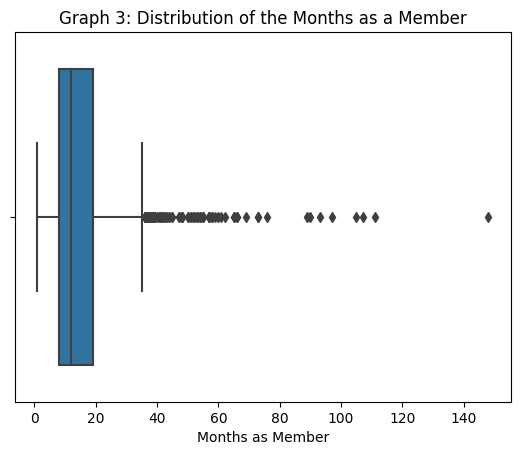

In [11]:
sns.boxplot(x = df['months_as_member']).set(title = "Graph 3: Distribution of the Months as a Member", xlabel = 'Months as Member')

### Inspecting number of categories in the Categorical variables 

In [12]:
df.select_dtypes(['object','category']).nunique()

day_of_week    7
time           2
category       6
dtype: int64

### Looking at the average Months as Member compared to Attended variable 

[Text(0.5, 1.0, 'Graph 4:Comparison of Mean Months as Member vs Attended'),
 Text(0.5, 0, 'Attended'),
 Text(0, 0.5, 'Months as Member')]

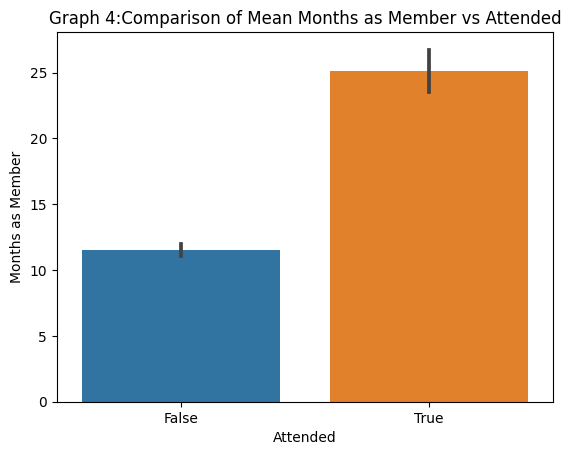

In [13]:
sns.barplot(data = df, x = 'attended', y = 'months_as_member').set(title = 'Graph 4:Comparison of Mean Months as Member vs Attended', xlabel = 'Attended', ylabel = 'Months as Member')

### Looking at the distribtuion of Months as Member compared to Attended variable

[Text(0.5, 1.0, 'Graph 5: Distribution of Months as Member vs Attended'),
 Text(0, 0.5, 'Months as Member'),
 Text(0.5, 0, 'Attended')]

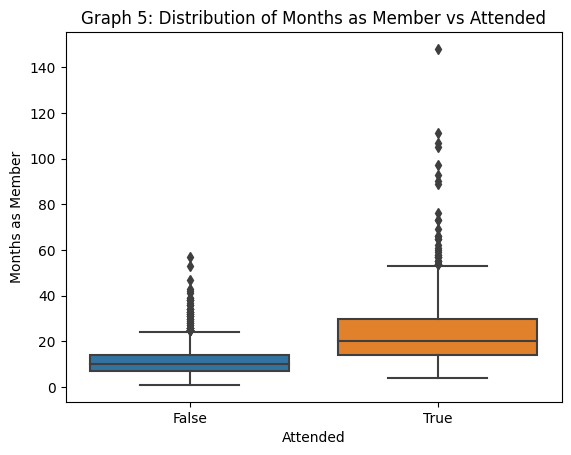

In [14]:
sns.boxplot(data=df, x='attended',y='months_as_member').set(title='Graph 5: Distribution of Months as Member vs Attended', ylabel = 'Months as Member', xlabel = 'Attended')

### Extra Plots not used to answer questions

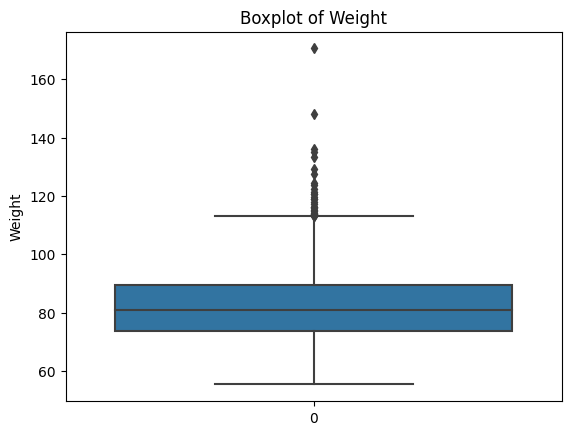

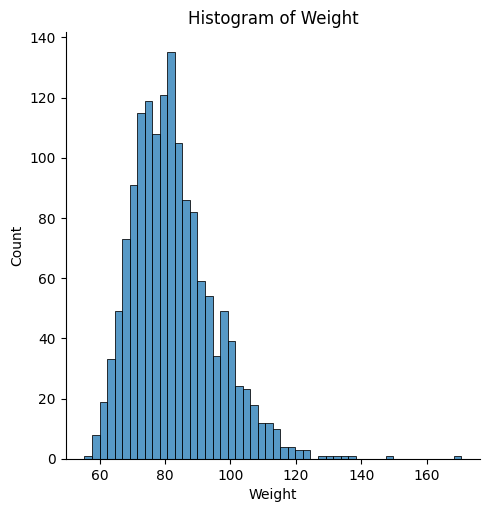

In [15]:
# fig, axes = plt.subplots(2,1)
sns.boxplot(df['weight']).set(title='Boxplot of Weight', ylabel = 'Weight')
sns.displot(df['weight'], kind = 'hist', bins = 50).set(title='Histogram of Weight', xlabel = 'Weight', ylabel = 'Count')
# df['weight'].hist(bins = 50)
# plt.xlabel('Weight (kg)')
# plt.ylabel('Count')

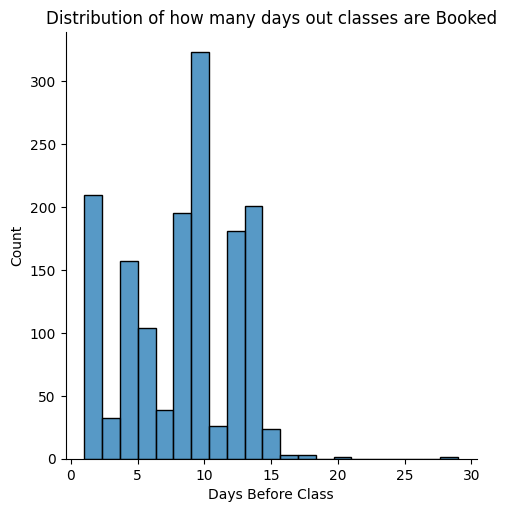

In [16]:
sns.displot(df['days_before'], kind = 'hist').set(title = 'Distribution of how many days out classes are Booked', xlabel = 'Days Before Class', ylabel = 'Count')

[Text(0.5, 1.0, 'Morning vs Afternoon Bookings'),
 Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Count')]

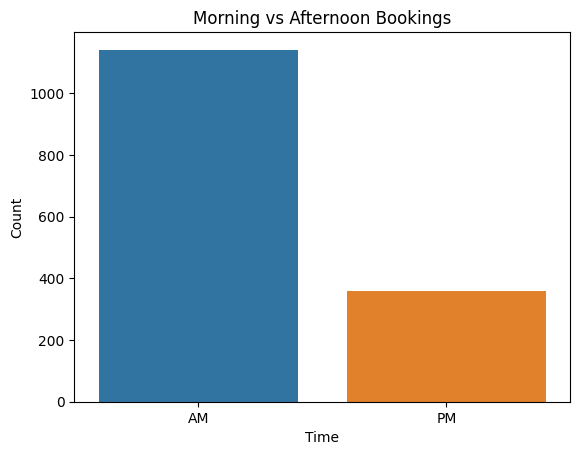

In [17]:
sns.countplot(data =df, x = 'time', order = ['AM', 'PM']).set(title = 'Morning vs Afternoon Bookings', xlabel = 'Time', ylabel = 'Count')

[Text(0.5, 1.0, 'Weight vs Months as Member'),
 Text(0.5, 0, 'Months as Member'),
 Text(0, 0.5, 'Weight')]

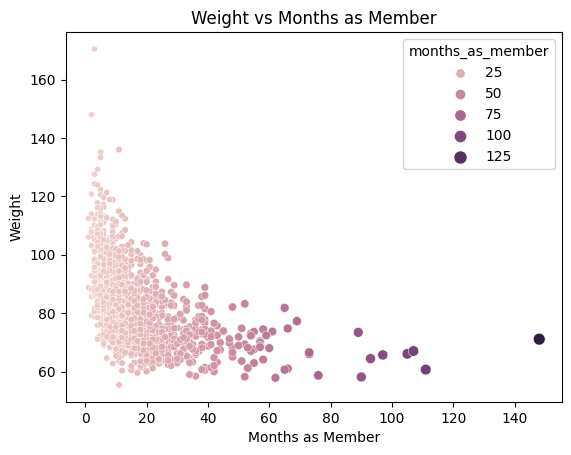

In [18]:
sns.scatterplot(data = df, x = 'months_as_member', y = 'weight',hue = 'months_as_member', size = 'months_as_member').set(title = 'Weight vs Months as Member', xlabel = 'Months as Member', ylabel = 'Weight')

[Text(0.5, 1.0, 'Bookings per Day of Week'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Day of Week')]

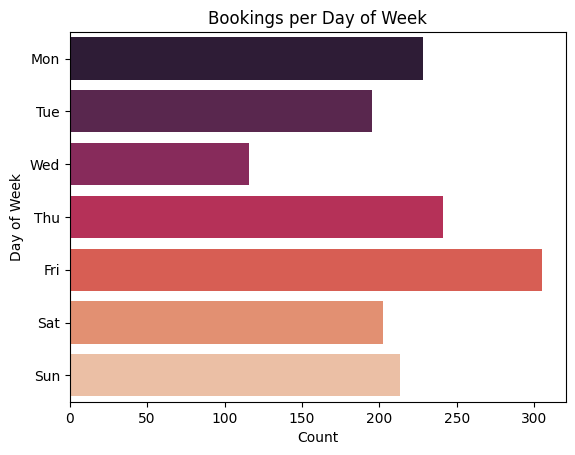

In [19]:
sns.countplot(data = df, y = 'day_of_week', order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette = 'rocket').set(title = 'Bookings per Day of Week', xlabel = 'Count', ylabel = 'Day of Week')

### Make changes to enable modeling

In [15]:
df = df.drop(columns=['booking_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   months_as_member  1500 non-null   int64   
 1   weight            1500 non-null   float64 
 2   days_before       1500 non-null   int64   
 3   day_of_week       1500 non-null   category
 4   time              1500 non-null   category
 5   category          1500 non-null   category
 6   attended          1500 non-null   bool    
dtypes: bool(1), category(3), float64(1), int64(2)
memory usage: 41.8 KB


In [16]:
from sklearn import preprocessing
df['attended'] = df.attended.replace({False: 0, True:1})
features = df.drop(columns='attended')
X = pd.get_dummies(features, columns=['day_of_week','time','category'])
y = df['attended'] 



## Model Fitting

Predicting whether a member will attend a fitness class or not is a binary **classification problem** in machine learning. I am choosing the **Logistic Regression model** as a baseline model because it is very efficient to train and interpret. The comparison model I am choosing is the **Decision Tree model** because it works well with mixed data types and is less influenced by outliers.

In [17]:
#importing the ML models and peformance metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

In [18]:
# Split dataset into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Method 1: Logistic Regression Model

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log =logreg.predict(X_test)

### Method 2: Decision Tree Model

In [20]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

## Model Evaluation

I am choosing to use classfication report, specifically **accuracy** to evaluate the model because it is easier to interpret for all audiences. Accuracy score is used to measure the model performance in terms of measuring the ratio of sum of true positive and true negatives out of all the predictions made.

The accuracy of the Logistic Regression model and Decision Tree model is 0.74 and 0.67, meaning the Logistic Regression model predicts more correctly whether a gym member will attend a class that they have booked or not given the variables: how many months as a member, member's weight, days booked before class, day of the week of the class, time of day of class, and type of fitness class.  

From this metric, we can conclude that the **Logistic Regression model** has a higher chance of predicting whether or not a member will attend a class or not. 


### Evaluating Logistic Regression Model

In [22]:
print(confusion_matrix(y_test, y_pred_log))

[[181  20]
 [ 59  40]]


In [21]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       201
           1       0.67      0.40      0.50        99

    accuracy                           0.74       300
   macro avg       0.71      0.65      0.66       300
weighted avg       0.73      0.74      0.72       300



### Evaluating Decision Tree Model

In [24]:
print(confusion_matrix(y_test, y_pred_clf))

[[152  49]
 [ 51  48]]


In [23]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       201
           1       0.49      0.48      0.49        99

    accuracy                           0.67       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.66      0.67      0.67       300

